In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset

Data can be found on https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [2]:
path = './data'

## Data Exploration

In [3]:
df = pd.read_parquet(path + "/yellow_tripdata_2022-01.parquet", engine= "auto")
df = df.sample(frac=0.05)

In [4]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
df.shape

(123197, 19)

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
452136,1,2022-01-07 16:48:52,2022-01-07 17:35:27,1.0,36.40,5.0,N,132,265,2,120.0,1.25,0.0,0.00,6.55,0.3,128.10,0.0,1.25
722332,1,2022-01-11 11:41:01,2022-01-11 11:56:29,2.0,2.60,1.0,N,113,161,1,12.0,2.50,0.5,3.80,0.00,0.3,19.10,2.5,0.00
171767,1,2022-01-03 18:30:10,2022-01-03 19:03:48,1.0,18.40,2.0,N,132,90,1,52.0,8.25,0.5,5.00,6.55,0.3,72.60,2.5,1.25
663591,2,2022-01-10 14:35:14,2022-01-10 14:49:27,1.0,1.61,1.0,N,236,162,1,10.5,0.00,0.5,3.45,0.00,0.3,17.25,2.5,0.00
2127350,1,2022-01-28 06:01:22,2022-01-28 06:13:03,1.0,2.60,1.0,N,186,229,2,10.5,2.50,0.5,0.00,0.00,0.3,13.80,2.5,0.00


In [7]:
df2 = pd.read_csv(path + "/taxi+_zone_lookup.csv")
df2['Borough'].value_counts()

Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
Unknown           2
EWR               1
Name: Borough, dtype: int64

In [8]:
df2.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [9]:
df2.shape

(265, 4)

In [10]:
# Inicio Manhattan
dfPUManhattan = df[df['PULocationID'].isin(df2.loc[df2['Borough']=='Manhattan', 'LocationID'])]
# Fin Manhattan
dfDOManhattan = df[df['DOLocationID'].isin(df2.loc[df2['Borough']=='Manhattan', 'LocationID'])]
# Solo Manhattan
dfManhattan = df.loc[dfPUManhattan.index.intersection(dfDOManhattan.index)]


In [11]:
print (df.shape)
print (dfPUManhattan.shape)
print (dfDOManhattan.shape)
print (dfManhattan.shape)

(123197, 19)
(111273, 19)
(110493, 19)
(104794, 19)


In [12]:
dfManhattan['duation'] = dfManhattan['tpep_dropoff_datetime'] - dfManhattan['tpep_pickup_datetime']
dfManhattan['duationmins'] = dfManhattan['duation'].dt.total_seconds()/60
dfManhattan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duation,duationmins
722332,1,2022-01-11 11:41:01,2022-01-11 11:56:29,2.0,2.60,1.0,N,113,161,1,...,2.5,0.5,3.80,0.0,0.3,19.10,2.5,0.0,0 days 00:15:28,15.466667
663591,2,2022-01-10 14:35:14,2022-01-10 14:49:27,1.0,1.61,1.0,N,236,162,1,...,0.0,0.5,3.45,0.0,0.3,17.25,2.5,0.0,0 days 00:14:13,14.216667
2127350,1,2022-01-28 06:01:22,2022-01-28 06:13:03,1.0,2.60,1.0,N,186,229,2,...,2.5,0.5,0.00,0.0,0.3,13.80,2.5,0.0,0 days 00:11:41,11.683333
1649476,2,2022-01-22 16:10:35,2022-01-22 16:12:20,1.0,0.31,1.0,N,237,237,1,...,0.0,0.5,1.50,0.0,0.3,8.30,2.5,0.0,0 days 00:01:45,1.750000
58601,2,2022-01-01 22:58:09,2022-01-01 23:07:48,1.0,1.86,1.0,N,158,164,1,...,0.5,0.5,2.56,0.0,0.3,15.36,2.5,0.0,0 days 00:09:39,9.650000


In [13]:
dfManhattan['duationmins'].describe()

count    104794.000000
mean         11.672658
std          41.149781
min           0.000000
25%           5.933333
50%           9.191667
75%          13.666667
max        1439.600000
Name: duationmins, dtype: float64

[Text(0.5, 1.0, 'Histograma de duración de los viajes')]

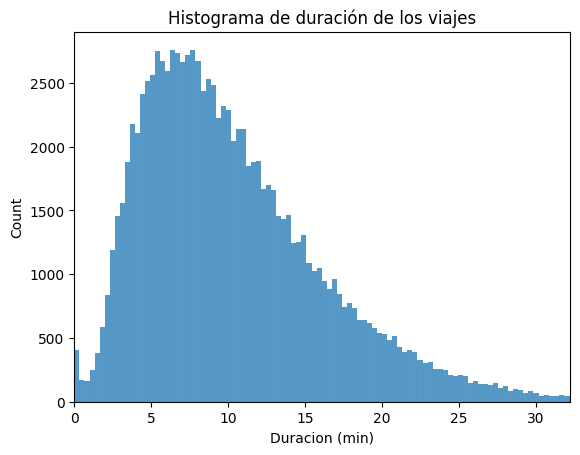

In [14]:
histo = sns.histplot(data=dfManhattan, x='duationmins')
histo.set(xlim=(0,dfManhattan['duationmins'].mean() + 0.5*dfManhattan['duationmins'].std()))
histo.set(xlabel='Duracion (min)')
histo.set(title='Histograma de duración de los viajes')

[Text(0.5, 1.0, 'Histograma del pago total de los viajes')]

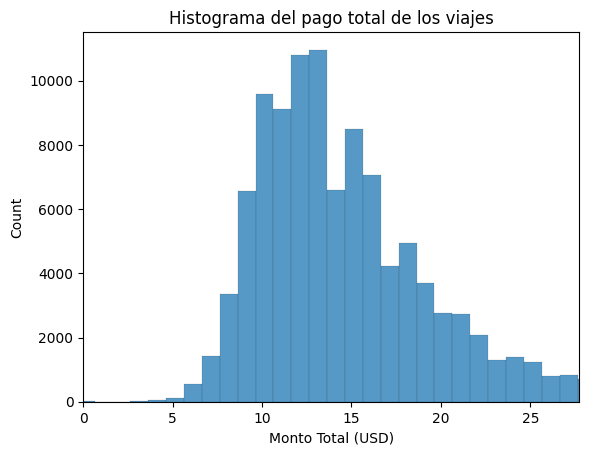

In [15]:
histo2 = sns.histplot(data=dfManhattan, x='total_amount', binwidth=1)
histo2.set(xlim=(0,dfManhattan['total_amount'].mean() + 2*dfManhattan['total_amount'].std()))
histo2.set(xlabel='Monto Total (USD)')
histo2.set(title='Histograma del pago total de los viajes')

In [34]:
histo.figure.savefig('durationHist.jpg')
histo2.figure.savefig('totalAmountHist.jpg')